In [1]:
!pip install natasha

In [2]:
# Установить можно через pip.
from natasha import *

In [3]:
sents = open('sents.txt').read().splitlines()

In [4]:
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

In [68]:
extractor = NamesExtractor(morph_vocab)

In [69]:
doc = Doc('\n'.join(sents))

In [70]:
doc

Doc(text='«Война́ и мир» (рус. дореф. «Война и миръ») — ром...)

In [71]:
doc.segment(segmenter)
print(doc.tokens[:5])

[DocToken(stop=1, text='«'), DocToken(start=1, stop=7, text='Война́'), DocToken(start=8, stop=9, text='и'), DocToken(start=10, stop=13, text='мир'), DocToken(start=13, stop=14, text='»')]


In [72]:
print(doc.sents[:5])

[DocSent(stop=27, text='«Война́ и мир» (рус. дореф.', tokens=[...]), DocSent(start=28, stop=163, text='«Война и миръ») — роман-эпопея Льва Николаевича Т..., tokens=[...]), DocSent(start=164, stop=213, text='Эпилог романа доводит повествование до 1820 года...., tokens=[...]), DocSent(start=216, stop=809, text='Содержание\n1\tИстория написания романа\n1.1\tИст..., tokens=[...]), DocSent(start=810, stop=982, text='В наброске предисловия к «Войне и миру» Толстой п..., tokens=[...])]


In [73]:
doc.tag_morph(morph_tagger)
print(doc.tokens[:5])

[DocToken(stop=1, text='«', pos='PUNCT'), DocToken(start=1, stop=7, text='Война́', pos='NOUN', feats=<Inan,Nom,Masc,Sing>), DocToken(start=8, stop=9, text='и', pos='CCONJ'), DocToken(start=10, stop=13, text='мир', pos='NOUN', feats=<Inan,Nom,Masc,Sing>), DocToken(start=13, stop=14, text='»', pos='PUNCT')]


In [74]:
doc.sents[0].morph.print()

                   « PUNCT
              Война́ NOUN|Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing
                   и CCONJ
                 мир NOUN|Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing
                   » PUNCT
                   ( PUNCT
                 рус NOUN|Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing
                   . PUNCT
               дореф NOUN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Plur
                   . PUNCT


In [75]:
for token in doc.tokens:
    token.lemmatize(morph_vocab)
print(doc.tokens[:5])

[DocToken(stop=1, text='«', pos='PUNCT', lemma='«'), DocToken(start=1, stop=7, text='Война́', pos='NOUN', feats=<Inan,Nom,Masc,Sing>, lemma='война́'), DocToken(start=8, stop=9, text='и', pos='CCONJ', lemma='и'), DocToken(start=10, stop=13, text='мир', pos='NOUN', feats=<Inan,Nom,Masc,Sing>, lemma='мир'), DocToken(start=13, stop=14, text='»', pos='PUNCT', lemma='»')]


In [76]:
{token.text: token.lemma for token in doc.tokens[:10]}

{'«': '«',
 'Война́': 'война́',
 'и': 'и',
 'мир': 'мир',
 '»': '»',
 '(': '(',
 'рус': 'рус',
 '.': '.',
 'дореф': 'дореф'}

In [77]:
doc.parse_syntax(syntax_parser)
print(doc.tokens[:5])

[DocToken(stop=1, text='«', id='1_1', head_id='1_2', rel='punct', pos='PUNCT', lemma='«'), DocToken(start=1, stop=7, text='Война́', id='1_2', head_id='1_0', rel='root', pos='NOUN', feats=<Inan,Nom,Masc,Sing>, lemma='война́'), DocToken(start=8, stop=9, text='и', id='1_3', head_id='1_4', rel='cc', pos='CCONJ', lemma='и'), DocToken(start=10, stop=13, text='мир', id='1_4', head_id='1_2', rel='conj', pos='NOUN', feats=<Inan,Nom,Masc,Sing>, lemma='мир'), DocToken(start=13, stop=14, text='»', id='1_5', head_id='1_7', rel='punct', pos='PUNCT', lemma='»')]


In [78]:
doc.sents[1].syntax.print()

              ┌► «            punct
  ┌─┌─┌►┌─┌─┌─└─ Война        nsubj
  │ │ │ │ │ │ ┌► и            cc
  │ │ │ │ │ └►└─ миръ         conj
  │ │ │ │ └────► »            punct
  │ │ │ └──────► )            punct
  │ │ │       ┌► —            punct
┌─│ └►└─────┌─└─ роман-эпопея parataxis
│ │       ┌─└►┌─ Льва         nmod
│ │       │   └► Николаевича  flat:name
│ │       └────► Толстого     flat:name
│ │           ┌► ,            punct
│ └────►┌─┌─┌─└─ описывающий  acl
│       │ │ │ ┌► русское      amod
│       │ │ └►└─ общество     obj
│       │ │   ┌► в            case
│       │ └►┌─└─ эпоху        obl
│       │ ┌─└──► войн         nmod
│       │ │   ┌► против       case
│       │ └──►└─ Наполеона    nmod
│       │   ┌──► в            case
│       │   │ ┌► 1805—1812    amod
│       └──►└─└─ годах        obl
└──────────────► .            punct


# NER
Extract standart named entities: names, locations, organizations. 
Depends on segmentation step. 
Defines spans property of doc. Uses Slovnet NER model internally.

In [79]:
doc.tag_ner(ner_tagger)
print(doc.spans[:5])

[DocSpan(start=59, stop=84, type='PER', text='Льва Николаевича Толстого', tokens=[...]), DocSpan(start=135, stop=144, type='PER', text='Наполеона', tokens=[...]), DocSpan(start=694, stop=701, type='PER', text='Замысел', tokens=[...]), DocSpan(start=850, stop=857, type='PER', text='Толстой', tokens=[...]), DocSpan(start=975, stop=981, type='LOC', text='Россию', tokens=[...])]


In [80]:
# встроенная нейронка обученная на новостях
doc.ner.print()

«Война́ и мир» (рус. дореф. «Война и миръ») — роман-эпопея Льва 
                                                           PER──
Николаевича Толстого, описывающий русское общество в эпоху войн против
────────────────────                                                  
 Наполеона в 1805—1812 годах. Эпилог романа доводит повествование до 
 PER──────                                                           
1820 года.
Содержание
1 История написания романа
1.1 Источники, используемые для написания романа
2 Центральные персонажи
3 Сюжет
3.1 I том
3.2 II том
3.3 III том
3.4 IV том
3.5 Эпилог
4 Споры о названии
5 Критика
5.1 Критики XIX века
5.2 Современное восприятие
6 Экранизации и использование романа как литературной основы
6.1 Экранизации
6.2 Использование романа как литературной основы
6.3 Опера
6.4 Инсценировки
6.5 Театральные постановки
7 Примечания
8 Ссылки
История написания романа
Замысел эпопеи формировался задолго до начала работы над тем текстом, 
PER────                     

In [81]:
for span in doc.spans:
    span.normalize(morph_vocab)
print(doc.spans[:5])

[DocSpan(start=59, stop=84, type='PER', text='Льва Николаевича Толстого', tokens=[...], normal='Лев Николаевич Толстой'), DocSpan(start=135, stop=144, type='PER', text='Наполеона', tokens=[...], normal='Наполеон'), DocSpan(start=694, stop=701, type='PER', text='Замысел', tokens=[...], normal='Замысел'), DocSpan(start=850, stop=857, type='PER', text='Толстой', tokens=[...], normal='Толстой'), DocSpan(start=975, stop=981, type='LOC', text='Россию', tokens=[...], normal='Россия')]


In [19]:
{_.text: _.normal for _ in doc.spans if _.text != _.normal}

{'Льва Николаевича Толстого': 'Лев Николаевич Толстой',
 'Наполеона': 'Наполеон',
 'Россию': 'Россия',
 'Толстого': 'Толстой',
 'Бородинском поле': 'Бородинское поле',
 'Безухова': 'Безухов',
 'Платона Каратаева': 'Платон Каратаев',
 'Наташи Ростовой': 'Наташа Ростова',
 'Л. Н. Толстого': 'Л. Н. Толстой',
 'Александру Герцену': 'Александр Герцен',
 'Толстым': 'Толстой',
 'Пьера': 'Пьер',
 'Наташи': 'Наташа',
 'Русского архива': 'Русский архив',
 'Дворце дожей': 'Дворец дожей',
 'Александра I': 'Александр I',
 'Верещагина': 'Верещагин',
 'Кутузову': 'Кутузов',
 'Наполеоном': 'Наполеон',
 'Наполеону': 'Наполеон',
 'Фету': 'Фет',
 'Войны': 'Война',
 'Ясной Поляны': 'Ясная Поляна',
 'Эдисону': 'Эдисон',
 'Токутоми Рока': 'Токутоми Рок',
 'И. Бе́рлина': 'И. Бе́рлин',
 'П. Ж. Прудона': 'П. Ж. Прудон',
 'Толстым Прудона': 'Толстой Прудона',
 'России': 'Россия',
 'Франции': 'Франция',
 'М.И. Богдановича': 'М.И. Богданович',
 'М. Корфа': 'М. Корф',
 'Михаила Семёновича Воронцова» М. П. Щербинин

In [20]:
for span in doc.spans:
    if span.type == PER:
        span.extract_fact(extractor)
doc.spans[:5]

[DocSpan(start=59, stop=84, type='PER', text='Льва Николаевича Толстого', tokens=[...], normal='Лев Николаевич Толстой', fact=DocFact(slots=[...])),
 DocSpan(start=135, stop=144, type='PER', text='Наполеона', tokens=[...], normal='Наполеон', fact=DocFact(slots=[...])),
 DocSpan(start=694, stop=701, type='PER', text='Замысел', tokens=[...], normal='Замысел', fact=DocFact(slots=[...])),
 DocSpan(start=850, stop=857, type='PER', text='Толстой', tokens=[...], normal='Толстой', fact=DocFact(slots=[...])),
 DocSpan(start=975, stop=981, type='LOC', text='Россию', tokens=[...], normal='Россия')]

In [21]:
{_.normal: (_.fact.as_dict if _.fact else None) for _ in doc.spans if _.type == PER and _.fact}

{'Лев Николаевич Толстой': {'first': 'Лев',
  'last': 'Толстой',
  'middle': 'Николаевич'},
 'Наполеон': {'first': 'Наполеон'},
 'Замысел': {'last': 'Замысел'},
 'Толстой': {'last': 'Толстой'},
 'Лев Николаевич': {'first': 'Лев', 'last': 'Николаевич'},
 'Л. Н. Толстой': {'first': 'Л', 'last': 'Толстой', 'middle': 'Н'},
 'Андрей': {'first': 'Андрей'},
 'Николай': {'first': 'Николай'},
 'Пьер': {'first': 'Пьер'},
 'Наташа': {'first': 'Наташа'},
 'Марья': {'first': 'Марья'},
 'Элен': {'first': 'Элен'},
 'Анатоль': {'first': 'Анатоль'},
 'Безухов': {'last': 'Безухов'},
 'Толстый': {'last': 'Толстый'},
 'Платон Каратаев': {'first': 'Платон', 'last': 'Каратаев'},
 'Наташа Ростова': {'first': 'Наташа', 'last': 'Ростова'},
 'Кутузов': {'last': 'Кутузов'},
 'Ростовых': {'last': 'Ростовых'},
 'Тип. Т. Рисъ': {'first': 'Т', 'last': 'Рисъ'},
 'Тургеневу': {'last': 'Тургеневу'},
 'Александр Герцен': {'first': 'Александр', 'last': 'Герцен'},
 'П. И. Бартеневым': {'first': 'П', 'last': 'Бартеневым', 

Косяки:
* 'Замысел': {'last': 'Замысел'},
* 'Тип. Т. Рисъ': {'first': 'Т', 'last': 'Рисъ'},
*  'И': {'last': 'И'},
* 'Михаил Семенович Воронцов» М. П. Щербинин': {'first': 'Михаил',
  'last': 'Воронцов',
  'middle': 'Семенович'},
* Реж. — Г. Садченков


In [22]:
# Описание нейронки
ner_tagger

NewsNERTagger(
    infer=NERInfer(
        model=NER(
            emb=WordShapeEmbedding(
                word=NavecEmbedding(
                    id='news_v1_1B_250K_300d_100q',
                    indexes=Weight(
                        shape=[250002,
                         100],
                        dtype='uint8',
                        array=array([[176, 222, 248, ..., 244, 183, 191],
                               [215, 200, 168, ..., 120, 217,  21],
                               [ 83, 174,  54, ..., 106,  88, 251],
                               ...,
                               [133, 125, 123, ..., 124,  94,  24],
                               [183,  49, 180, ..., 151, 167,  68],
                               [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
                    ),
                    codes=Weight(
                        shape=[100,
                         256,
                         3],
                        dtype='float32',
                   

Date(year='2011', month='февраля', day='05')


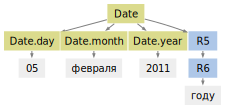

In [51]:
# Попытка выделить ner для дат (тыкаю синтаксис yargy)
from yargy.predicates import gte, lte
from yargy import Parser, rule, or_, and_, not_
from yargy.predicates import caseless, normalized, dictionary
from natasha import *

MONTHS = {
    'январь',
    'февраль',
    'март',
    'апрель',
    'мая',
    'июнь',
    'июль',
    'август',
    'сентябрь',
    'октябрь',
    'ноябрь',
    'декабрь'
}
MONTH_NAME = dictionary(MONTHS)
YEAR_WORDS = or_(
    rule(caseless('г'), '.'),
    rule(normalized('год'))
)


Date = fact(
    'Date',
    ['year', 'month', 'day']
)


DAY = and_(
    gte(1),
    lte(31)
).interpretation(
    Date.day
)
MONTH = and_(
    gte(1),
    lte(12)
).interpretation(
    Date.month
)
YEAR = and_(
    gte(1),
    lte(2018)
).interpretation(
    Date.year
)
MONTH_NAME = dictionary(
    MONTHS
).interpretation(
    Date.month
)
DATE = or_(
    rule(YEAR, '-', MONTH, '-', DAY),
    rule(
        DAY,
        MONTH_NAME,
        YEAR,
        YEAR_WORDS.optional()
    )
).interpretation(Date)

parser = Parser(DATE)
match = parser.match('05 февраля 2011 году')
print(match.fact)
match.tree.as_dot

Name(first=None, last='грибоедов', middle=None)
Name(first='антон', last=None, middle=None)
Name(first='вячеслав', last='бушуев', middle=None)
Name(first='вера', last='бушуева', middle=None)
Name(first='л', last='толстой', middle='н')
Name(first='николай', last='ростов', middle='Ильич')
Name(first='илья', last='ростов', middle='Андреевича')
Name(first=None, last='зотов', middle=None)
Name(first='леонид', last=None, middle=None)
-----
Name(first=None, last='с', middle=None)
Name(first='Антон', last='Грибоедова', middle=None)
Name(first='Вячеслава', last='Бушуева', middle=None)
Name(first=None, last='и', middle=None)
Name(first='Веру', last='Бушуеву', middle=None)
Name(first='Л', last='Толстой', middle='Н')
Name(first='Николай', last='Граф', middle='Ильич')
Name(first=None, last='Ростов', middle=None)
Name(first=None, last='старший', middle=None)
Name(first='Ильи', last='Ростова', middle='Андреевича')
Name(first=None, last='русские', middle=None)
Name(first='романы', last=None, middle=No

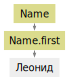

In [52]:
from yargy import Parser, rule, or_, and_, not_
from yargy.tokenizer import MorphTokenizer
from yargy.pipelines import morph_pipeline
from yargy.predicates import gram, is_capitalized
from yargy.relations import gnc_relation
from yargy.interpretation import fact
from IPython.display import display
from natasha import *

gnc = gnc_relation()  # согласование по gender, number и case (падежу, числу и роду)

# ФИО
Name = fact(
    'Name',
    ['first', 'last', 'middle']
)

# Фамилия (фамилия и не аббревиатура)
LAST = and_(
    is_capitalized(),
    gram('Surn'),
    not_(gram('Abbr')),
).interpretation(
    Name.last.inflected()
).match(gnc)

# Имя (имя и не аббревиатура)
FIRST = and_(
    is_capitalized(),
    gram('Name'),
    not_(gram('Abbr')),
).interpretation(
    Name.first.inflected()
).match(gnc)

# Отчество (отчество и не аббревиатура)
MIDDLE = and_(
    gram('Patr'),
    not_(gram('Abbr')),
).interpretation(
    Name.middle
).match(gnc)
    
# ФИО:
NAME = or_(
    # И.О. Фамилия
    rule(
        and_(is_capitalized(), gram('Abbr')).interpretation(Name.first.inflected()),
        '.',
        and_(is_capitalized(), gram('Abbr')).interpretation(Name.middle.inflected()),
        '.',
        LAST,
    ),
    # Фамилия [Имя]
    rule(
        LAST,
        FIRST.optional()
    ),
    # Имя [Фамилия]
    rule(
        FIRST,
        LAST.optional()
    ),
    # Имя Отчество [Фамилия]
    rule(
        FIRST,
        MIDDLE,
        LAST.optional(),
    ),
    # И. Фамилия
    rule(
        and_(is_capitalized(), gram('Abbr')).interpretation(Name.first.inflected()),
        LAST,
    ),
).interpretation(
    Name
)

# Обрезали дефолтную c.name.NAME,
# т.к. даёт много ложно положительных
text = '''
... с улицы Грибоедова Антон свернул на ...
... Бушуева Вячеслава и Бушуеву Веру ...
... текст Л. Н. Толстой текст ...
... Граф Николай Ильич Ростов — старший сын Ильи Андреевича Ростова ...
... русские романы Р. Зотова «Леонид, ...
'''
parser = Parser(NAME)
for match in parser.findall(text):
    print(match.fact)

print('-----')

parser = Parser(grammars.name.NAME)
for match in parser.findall(text):
    print(match.fact)
    
match.tree.as_dot

In [53]:
# Описание имени
NAME

InterpretationRule(
    rule=OrRule(
        rules=[Rule(
             productions=[Production(
                  terms=[InterpretationRule(
                       rule=Rule(
                           productions=[Production(
                                terms=[AndPredicate(
                                     predicates=[is_capitalized(),
                                      GramPredicate(
                                          value='Abbr'
                                      )]
                                 )],
                                main=0
                            )]
                       ),
                       interpretator=AttributeNormalizerInterpretator(
                           attribute=Attribute(
                               fact=yargy.interpretation.fact.Name,
                               name='first',
                               default=None
                           ),
                           normalizer=InflectedNormalizer(
      

In [54]:
from natasha import *


# Персонаж = должность + ФИО
Person = fact(
    'Person',
    ['position', 'name']
)

#POSITION_WORDS = or_(
#    rule(normalized('император')),
#    rule(normalized('фрейлина'))
#)

# должности из "Войны и Мир"
POSITION = morph_pipeline([
    'император',
    'фрейлина',
    'князь',
    'княжна',
    'графиня',
    'граф'
])


# должность + ФИО с согласование родом, падежей и тд
PERSON = rule(
    POSITION.interpretation(
        Person.position
    ).match(gnc),
    NAME.interpretation(
        Person.name
    ).match(gnc)
).interpretation(
    Person
)

text = '''
... Фрейлина вдовствующей императрицы Анна Шерер ...
... Фрейлина Анна Шерер ...
... Император Александр, его приближённые уверены ...
... Княжна Марья заменяет Николеньке мать. ...
... Граф Ростов что-то делает ...
... Князь Василий поселяет дезориентированного новой жизнью Пьера у себя, намереваясь женить его на своей дочери ...
'''
person_parser = Parser(PERSON)
for match in person_parser.findall(text):
    print(match.fact, match.span)

Person(position='Фрейлина', name=Name(first='анна', last='шерер', middle=None)) [58, 77)
Person(position='Император', name=Name(first='александр', last=None, middle=None)) [86, 105)
Person(position='Княжна', name=Name(first='марья', last=None, middle=None)) [140, 152)
Person(position='Граф', name=Name(first=None, last='ростов', middle=None)) [187, 198)
Person(position='Князь', name=Name(first='василий', last=None, middle=None)) [221, 234)


Name(genre='журнале', name='«Русский вестник»', author=None) [7, 32)
Name(genre='романа', name='«Декабристы»', author=None) [54, 73)
Name(genre='роману', name='«Война и мир»', author=Name(first='л', last='толстой', middle='н')) [108, 143)


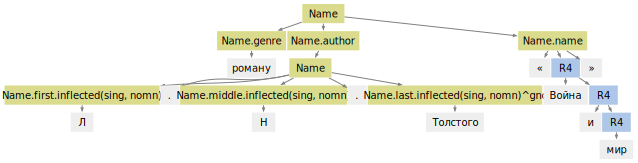

In [49]:
from yargy.predicates import gram, is_title
from yargy.predicates import eq

# Произведение жанр, название, автор
Book = fact(
    'Name',
    ['genre', 'name', 'author']
)

# Жанр
GENRE = morph_pipeline([
    'роман',
    'учебное пособие',
    'журнал'
]).interpretation(
    Book.genre
)


# Название (всё что в кавычках)
TITLE = rule(
    '«',
    not_(eq('»')).repeatable(),
    '»'
).interpretation(
    Book.name
)

# Автор = ФИО
AUTHOR = NAME.interpretation(
    Book.author
)

BOOK = or_(
    # Жанр Название
    rule(
        GENRE,
        TITLE,
    ),
    # Жанр Автор Название
    rule(
        GENRE,
        AUTHOR,
        TITLE,
    ),
    # Автор Жанр Название
    rule(
        AUTHOR,
        GENRE,
        TITLE,
    ),
).interpretation(
    Book
)

text = '''
... в журнале «Русский вестник» под ...
... главы из романа «Декабристы», написанные ...
... иллюстрации к роману Л. Н. Толстого «Война и мир» ...
'''
book_parser = Parser(BOOK)
for match in book_parser.findall(text):
    print(match.fact, match.span)
match.tree.as_dot

Interval(start=1819, stop=Date(year=1820, month=None, day=None)) [38, 52)
Interval(start=Date(year=1860, month=11, day=None), stop=Date(year=1861, month=None, day=None)) [124, 154)


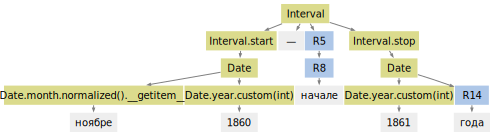

In [55]:
from natasha import *

# Интервал дат (фантазии нема)
Interval = fact(
    'Interval',
    ['start', 'stop']
)

PART_DATE = morph_pipeline([
    'начало',
    'середина',
    'конец',
])

DATE = grammars.date.DATE
INTERVAL = or_(
    # год — дата
    rule(
        grammars.date.YEAR.interpretation(Interval.start),
        "—",
        PART_DATE.optional(),
        DATE.interpretation(Interval.stop),
    ),
    # дата — дата
    rule(
        DATE.interpretation(Interval.start),
        "—",
        PART_DATE.optional(),
        DATE.interpretation(Interval.stop),
    ),
).interpretation(
    Interval
)

text = '''
... Прошло семь лет после 1812 года (1819—1820 годы). Толстой рассуждает о деятельности Александра I. ...
... написанные в ноябре 1860 — начале 1861 года ...
'''
interval_parser = Parser(INTERVAL)
for match in interval_parser.findall(text):
    print(match.fact, match.span)
match.tree.as_dot

In [29]:
date_extractor = DatesExtractor(morph_vocab)
# for span in doc.spans:
#    print(span, span.extract_fact(date_extractor))

matches = []
for sent in sents:
    for match in date_extractor(sent):
        start = max(match.start - 10, 0)
        stop = min(match.stop + 10, len(sent))
        context = sent[start:stop]
        matches.append((context, match.fact))
matches[:5]

[('на в 1805—1812 годах. Эпилог р',
  Date(
      year=1812,
      month=None,
      day=None
  )),
 ('ование до 1820 года.',
  Date(
      year=1820,
      month=None,
      day=None
  )),
 ('ал, что в 1856 году начал пис',
  Date(
      year=1856,
      month=None,
      day=None
  )),
 ('перешёл к 1825 году… Но и в 1',
  Date(
      year=1825,
      month=None,
      day=None
  )),
 ('у… Но и в 1825 году герой мой',
  Date(
      year=1825,
      month=None,
      day=None
  ))]

In [56]:
# косыль чтобы работал doc.tag_ner с парсерами 
class YargyParserWrapper:
    def __init__(self, parser):
        if not isinstance(parser, Parser):
            parser = Parser(parser)
        self.parser = parser
    def findall(self, *args, **kwargs):
        return self.parser.findall(*args, **kwargs)
    def __call__(self, text):
        # return self.parser.findall(text)
        for _ in self.parser.findall(text):
            yield _.span
    
parser_tmp = YargyParserWrapper(Parser(PERSON))
for match in parser_tmp('Император Александр, его приближённые уверены в победе над слабым противником'):
    print(match, match.start, match.stop)

[0, 19) 0 19


In [86]:
from natasha.record import Record
class Span(Record):
    __attributes__ = ['start', 'stop', 'type']

def has_span(spans, new_span):
    for span in spans:
        if span.start <= new_span.start and new_span.start <= span.stop:
            return True
    return False

# костыль чтобы работал doc.tag_ner
class CustomTagger:
    def __init__(self, parsers):
        self.spans = []
        self.parsers = parsers
    
    def __call__(self, text):
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        self.spans = [] # Span(1, 10, 'test')

        for sent in doc.sents:
            for type_name, parser in self.parsers:
                for match in parser(sent.text):
                    span = Span(sent.start + match.start, sent.start + match.stop, type_name)
                    # if not has_span(self.spans, span):
                    self.spans.append(span)
        
        return self

tagger = CustomTagger([
    # должность + ФИО
    ('PER', YargyParserWrapper(person_parser)),
    # Жанр Автор Название произведения
    ('BOOK', YargyParserWrapper(BOOK)),
    # Интервал дат
    ('INTVL', YargyParserWrapper(INTERVAL)),

    # ФИО
    ('NAME', YargyParserWrapper(NAME)),
    # Адреса
    ('ADDR', AddrExtractor(morph_vocab)),
    # Даты
    ('DATE', DatesExtractor(morph_vocab)),
])

doc = Doc('\n'.join(sents))
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)

doc.tag_ner(tagger)
doc.ner.print()

«Война́ и мир» (рус. дореф. «Война и миръ») — роман-эпопея Льва 
                                                           NAME─
Николаевича Толстого, описывающий русское общество в эпоху войн против
────────────────────                                                  
 Наполеона в 1805—1812 годах. Эпилог романа доводит повествование до 
 NAME─────   INTVL──────────                                         
                  DATE──────                                         
1820 года.
DATE───── 
Содержание
1 История написания романа
1.1 Источники, используемые для написания романа
2 Центральные персонажи
3 Сюжет
3.1 I том
3.2 II том
3.3 III том
3.4 IV том
3.5 Эпилог
4 Споры о названии
5 Критика
5.1 Критики XIX века
5.2 Современное восприятие
6 Экранизации и использование романа как литературной основы
6.1 Экранизации
6.2 Использование романа как литературной основы
6.3 Опера
6.4 Инсценировки
6.5 Театральные постановки
7 Примечания
8 Ссылки
История написания романа
Замысел эпопеи фор